In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d computingvictor/transactions-fraud-datasets -f transactions_data.csv
!unzip transactions_data.csv.zip


Dataset URL: https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets
License(s): apache-2.0
unzip:  cannot find or open transactions_data.csv.zip, transactions_data.csv.zip.zip or transactions_data.csv.zip.ZIP.


In [10]:
# import dependecies
import pandas as pd

# read csv file into pandas dataframe
df = pd.read_csv('transactions_data.csv')

print(df.head())
print(df.info())





        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 ent

In [12]:
# Remove any '$' signs or commas, then convert to float
df['amount'] = df['amount'].replace('[\$,]', '', regex = True).astype(float)


In [14]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df[ 'date' ], format = '%Y-%m-%d %H:%M:%S')

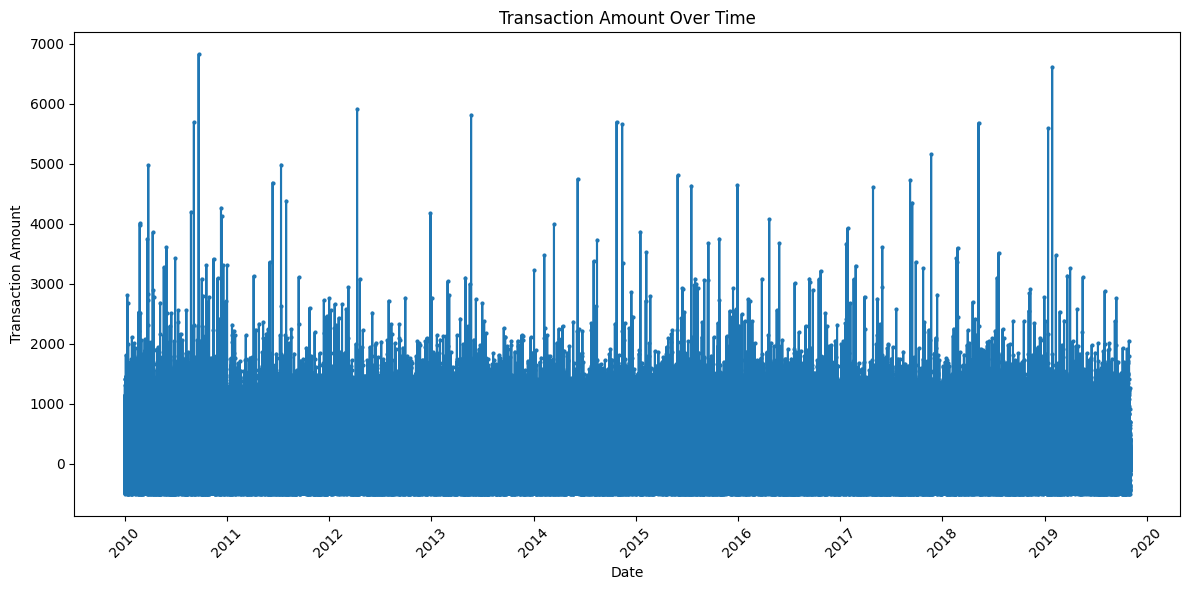

In [15]:
import matplotlib.pyplot as plt

# Create a plot of amount over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['amount'], marker='o', linestyle='-', markersize=2)
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Over Time')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
